In [1]:
import lightkurve as lk
from lightkurve import search_lightcurvefile
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import csv
import pandas as pd
from wotan import flatten


/home/fran/anaconda3/lib/python3.8/site-packages/lightkurve/config/__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to /home/fran/.lightkurve/cache. Please move all the files in the legacy directory /home/fran/.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(


In [2]:
TIC_ID = 383390264 # TIC_ID of our candidate
# Check and download data you want 
lcf_120= lk.search_lightcurve('TIC '+str(TIC_ID), mission="tess",author='spoc',cadence=120,sector=12).download_all() #explore and download the available data from SPOC for 120s 
#display what you found
print('Data for 120s: ',lcf_120)

Data for 120s:  LightCurveCollection of 1 objects:
    0: <TessLightCurve LABEL="TIC 383390264" SECTOR=12 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>


In [3]:
#convert the data in a lightkurve object which is very easy to handle 

lc=lcf_120.stitch().remove_nans() # remove of the nans 
flux=lc.flux
flux_err=lc.flux_err
time=lc.time
lc_new=lk.LightCurve(time=time, flux=flux,flux_err=flux_err) # we create a lightkurve object
flux_clean=lc_new.remove_outliers(sigma_lower=float('inf'), sigma_upper=float('inf')) # if you want to remove some outliers, here not done. 


Text(1624.9674409388524, 1.009, 'Sec. 12')

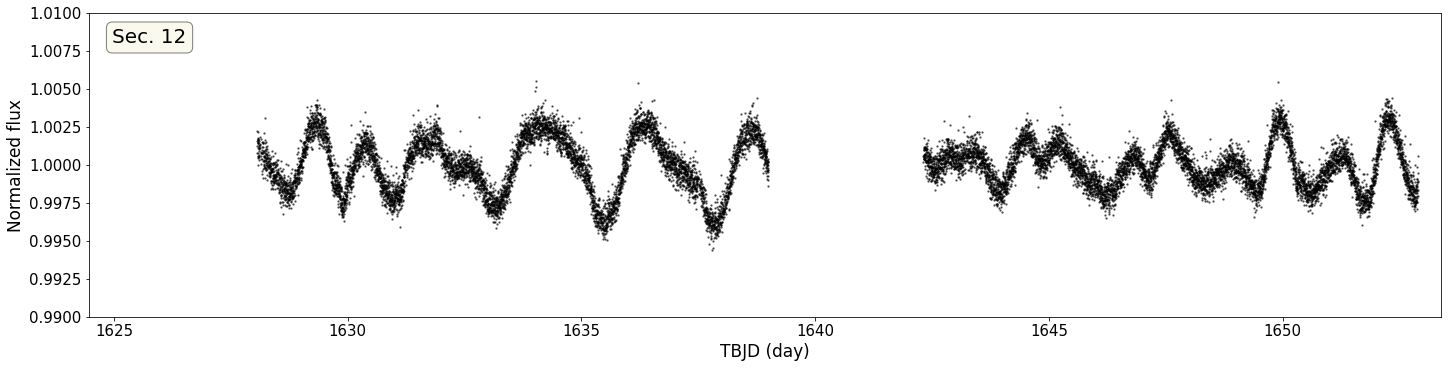

In [4]:
#Let's plot the data 

color1='black'
color2='firebrick'


fig1, (ax1) = plt.subplots(1, 1, figsize=(20,5),constrained_layout=True)
fig1.patch.set_facecolor('xkcd:white')
props = dict(boxstyle='round', facecolor='beige', alpha=0.5)

ax1.scatter(flux_clean.time.value, flux_clean.flux.value, color=color1, s=2, alpha=0.5,rasterized=True)
ax1.set_xlim(lcf_120[0]['time'][0].value-0.5,lcf_120[0]['time'][-1].value+0.5)
ax1.set_ylim(0.990,1.01)
ax1.set_ylabel('Normalized flux',fontsize=17)
ax1.set_xlabel('TBJD (day)',fontsize=17)
ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.text(lcf_120[0]['time'][0].value+0.01, 1.009, "Sec. 12", fontsize=20, verticalalignment='top', bbox=props)


In [5]:
# We see some clear variability that should be corrected before running any search for candidates.
# We use the WOTAN package, in particular the biweight algorithim, with a window_length = 1 day 
 
flatten_lc, trend_lc  = flatten(flux_clean.time.value, flux_clean.flux.value, window_length=1.0, return_trend=True, method='biweight',break_tolerance=0.5)


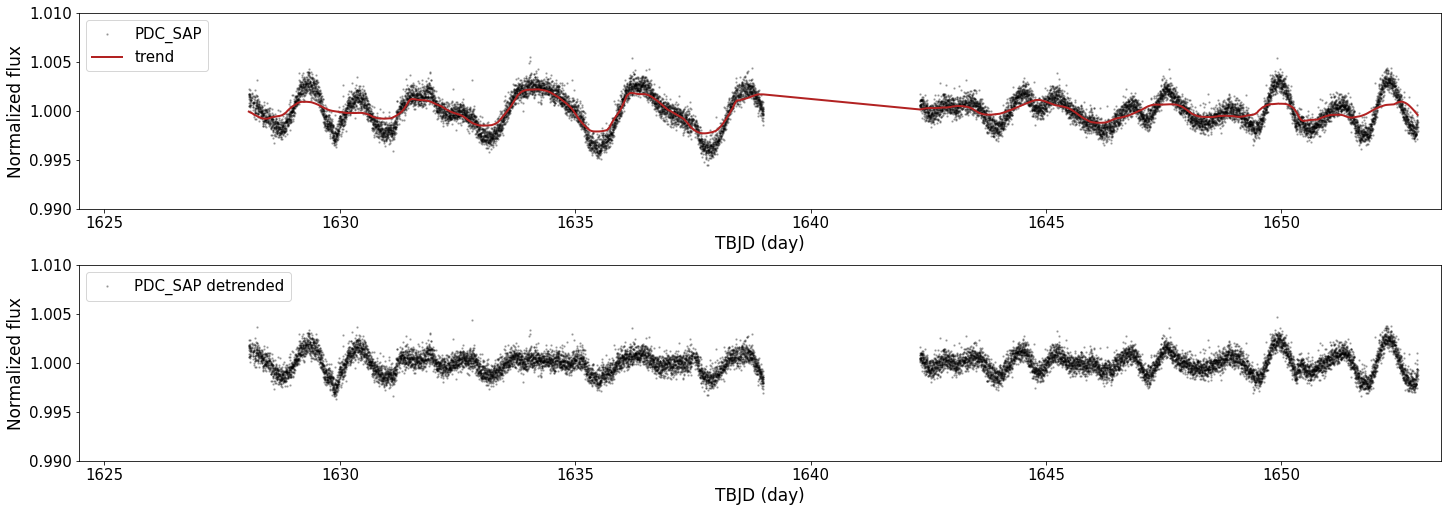

In [6]:
# plot the new lightcurve with the detrend applied avobe to see how looks like it

fig1, (ax1,ax2) = plt.subplots(2, 1, figsize=(20,7),constrained_layout=True)
fig1.patch.set_facecolor('xkcd:white')
props = dict(boxstyle='round', facecolor='beige', alpha=0.5)

ax1.scatter(flux_clean.time.value, flux_clean.flux.value, color=color1, s=2, alpha=0.25,rasterized=True, label='PDC_SAP')
ax1.plot(flux_clean.time.value, trend_lc, linewidth=2, color=color2, alpha=1.,label='trend')
ax1.set_xlim(lcf_120[0]['time'][0].value-0.5,lcf_120[0]['time'][-1].value+0.5)
ax1.set_ylim(0.990,1.01)
ax1.set_ylabel('Normalized flux',fontsize=17)
ax1.set_xlabel('TBJD (day)',fontsize=17)
ax1.tick_params(axis='both', which='major', labelsize=15)

ax2.scatter(flux_clean.time.value, flatten_lc, color=color1, s=2, alpha=0.25,rasterized=True,label='PDC_SAP detrended')
ax2.set_xlim(lcf_120[0]['time'][0].value-0.5,lcf_120[0]['time'][-1].value+0.5)
ax2.set_ylim(0.990,1.01)
ax2.set_ylabel('Normalized flux',fontsize=17)
ax2.set_xlabel('TBJD (day)',fontsize=17)
ax2.tick_params(axis='both', which='major', labelsize=15)

# Add legends
ax1.legend(fontsize=15,loc='upper left')
ax2.legend(fontsize=15,loc='upper left')

In [7]:
# We see that still some variability is present in the data, that's mean that the window_lenght is not appropiate. Let's try with a shorter value
 
flatten_lc2, trend_lc2  = flatten(flux_clean.time.value, flux_clean.flux.value, window_length=0.01, return_trend=True, method='biweight',break_tolerance=0.5)

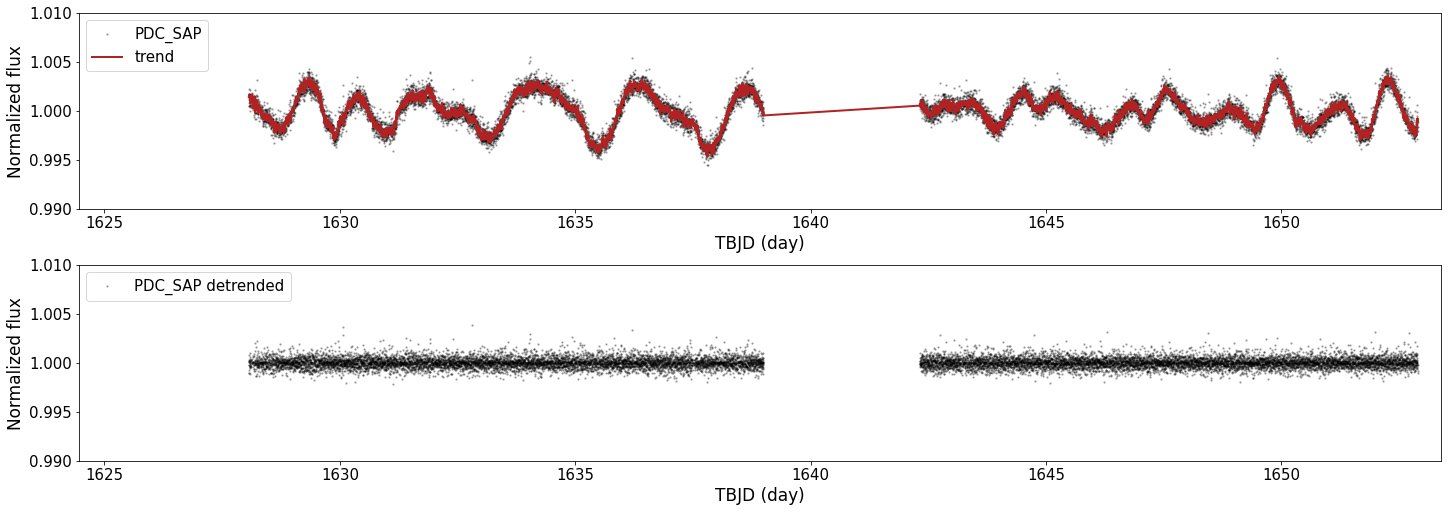

In [8]:
# plot again the new lightcurve with the detrend applied avobe to see how looks like it

fig1, (ax1,ax2) = plt.subplots(2, 1, figsize=(20,7),constrained_layout=True)
fig1.patch.set_facecolor('xkcd:white')
props = dict(boxstyle='round', facecolor='beige', alpha=0.5)

ax1.scatter(flux_clean.time.value, flux_clean.flux.value, color=color1, s=2, alpha=0.25,rasterized=True, label='PDC_SAP')
ax1.plot(flux_clean.time.value, trend_lc2, linewidth=2, color=color2, alpha=1.,label='trend')
ax1.set_xlim(lcf_120[0]['time'][0].value-0.5,lcf_120[0]['time'][-1].value+0.5)
ax1.set_ylim(0.990,1.01)
ax1.set_ylabel('Normalized flux',fontsize=17)
ax1.set_xlabel('TBJD (day)',fontsize=17)
ax1.tick_params(axis='both', which='major', labelsize=15)

ax2.scatter(flux_clean.time.value, flatten_lc2, color=color1, s=2, alpha=0.25,rasterized=True,label='PDC_SAP detrended')
ax2.set_xlim(lcf_120[0]['time'][0].value-0.5,lcf_120[0]['time'][-1].value+0.5)
ax2.set_ylim(0.990,1.01)
ax2.set_ylabel('Normalized flux',fontsize=17)
ax2.set_xlabel('TBJD (day)',fontsize=17)
ax2.tick_params(axis='both', which='major', labelsize=15)

# Add legends
ax1.legend(fontsize=15,loc='upper left')
ax2.legend(fontsize=15,loc='upper left')

In [9]:
# Too much! the detrend is so short that even removed the transits. We need to search for the optimum window_lenght
# This action is conducted by SHERLOCK automatically. This is what we call "multi-detrend" approach, which helps to identify the most appropriate detrend in a process similar to the following

results = {}  # dictionary to store the results

for i in range(10):
    window_length = 0.1 + (i * 0.1)  # Vary the value of window_length on each iteration
    flatten_lc, trend_lc = flatten(flux_clean.time.value, flux_clean.flux.value, window_length=window_length, return_trend=True, method='biweight', break_tolerance=0.5)
    # Save the results in the dictionary
    results[window_length] = (flatten_lc, trend_lc)

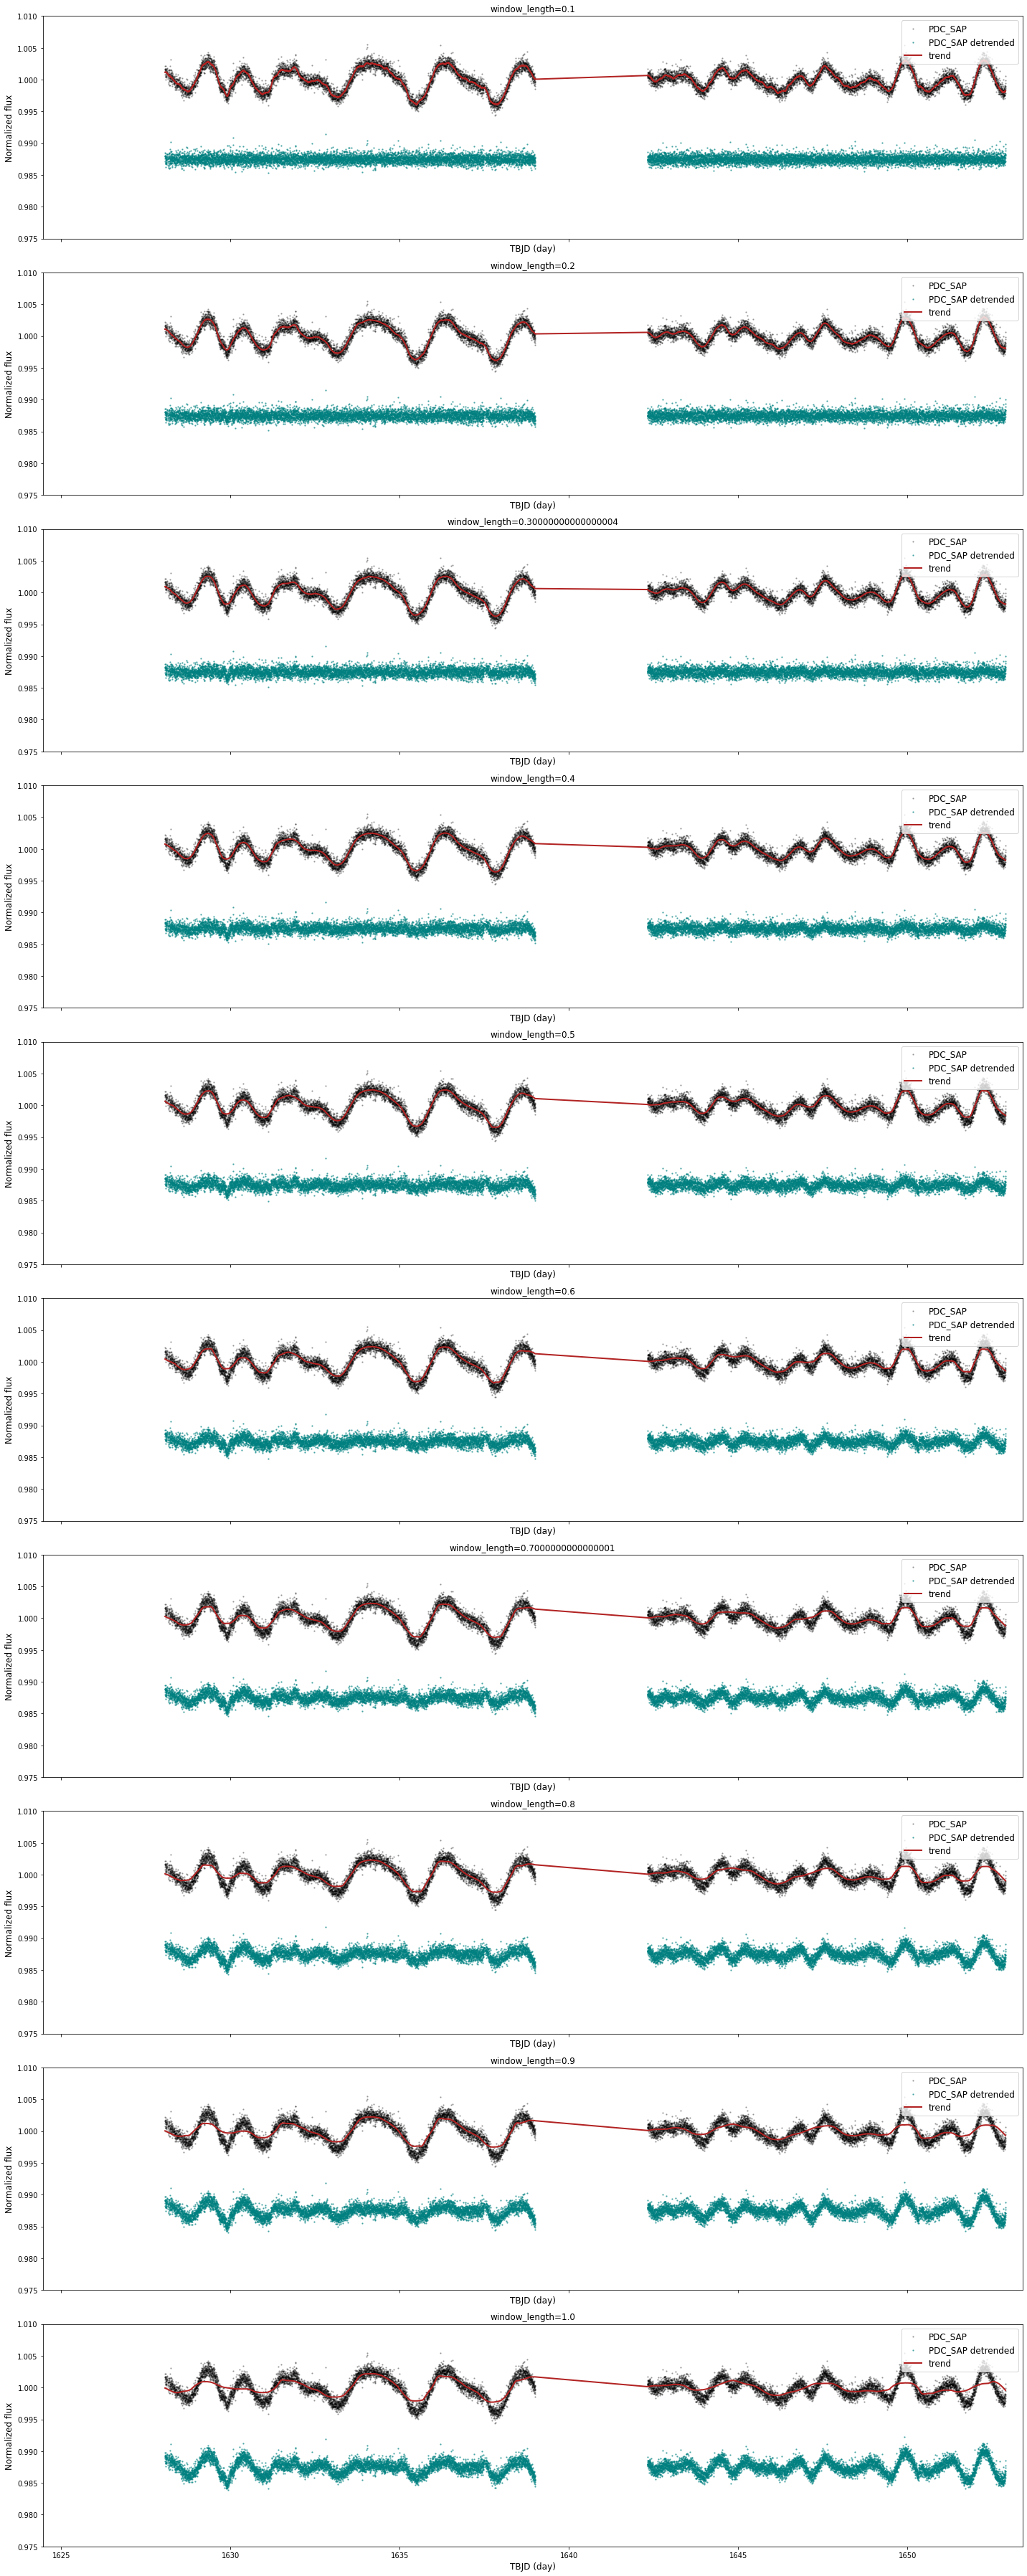

In [10]:
# We plot now all the detrends to see which one seems to offer the best light curve where to search for planets.
# When using SHERLOCK, the user can see all these lightcurves in the folder "detrends"
# and the lc_x.csv files correspond to the detended light curves 

color3='teal'

# we get the results stored in the dictionary
num_results = len(results)

fig, axs = plt.subplots(num_results, 1, figsize=(20, 5*num_results), sharex=True)
fig.patch.set_facecolor('xkcd:white')

# We iterate over the results and axis
for i, (window_length, (flatten_lc, trend_lc)) in enumerate(results.items()):
    ax = axs[i]  # we get the corresponding panel
    
    ax.scatter(flux_clean.time.value, flux_clean.flux.value, color=color1, s=2, alpha=0.25,rasterized=True, label='PDC_SAP')
    ax.scatter(flux_clean.time.value, flatten_lc-0.0125, color=color3, s=2, alpha=0.5,rasterized=True, label='PDC_SAP detrended')
    ax.plot(flux_clean.time.value, trend_lc, linewidth=2, color=color2, alpha=1.,label='trend')
    ax.set_xlim(lcf_120[0]['time'][0].value-0.5,lcf_120[0]['time'][-1].value+0.5)
    ax.set_ylim(0.975,1.01)
    
    # tittle indicating the window_length
    ax.set_title(f'window_length={window_length}')
    
    # labels
    ax.set_xlabel('TBJD (day)', fontsize=12)
    ax.set_ylabel('Normalized flux', fontsize=12)
    
    # leyend
    ax.legend(loc='upper right', fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
## TRY YOURSELF
#
# Which range of window lenghts is more approppiate? 
#